In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import * 
import geopandas as gpd

In [40]:
##################################################2.1######################################################
#Item a)
#Importação da base de dados wdi:
wdi = pd.read_csv(r'com_int_dados_aps1/wdi.csv')
wdi

,countryname,countrycode,indicatorname,indicatorcode,v1960,v1961,v1962,v1963,v1964,v1965,...,v2012,v2013,v2014,v2015,v2016,v2017,v2018,v2019,v2020,region
0,Aruba,ABW,Logistics performance index: Competence and qu...,LP.LPI.LOGS.XQ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean
1,Aruba,ABW,"External debt stocks, private nonguaranteed (P...",DT.DOD.DPNG.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean
2,Aruba,ABW,Time to resolve insolvency (years),IC.ISV.DURS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean
3,Aruba,ABW,Level of water stress: freshwater withdrawal a...,ER.H2O.FWST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean
4,Aruba,ABW,Manufactures exports (% of merchandise exports),TX.VAL.MANF.ZS.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.143876,20.004849,26.266299,31.860494,32.587242,34.540943,44.056308,NaN,NaN,Latin America & Caribbean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311824,Zimbabwe,ZWE,"Educational attainment, Doctoral or equivalent...",SE.TER.CUAT.DO.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.036750,NaN,NaN,NaN,Sub-Saharan Africa
311825,Zimbabwe,ZWE,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2070.000000,2310.000000,2360.000000,2410.000000,2560.000000,2760.000000,2990.000000,2730.000000,NaN,Sub-Saharan Africa
311826,Zimbabwe,ZWE,Coverage of social insurance programs in 4th q...,per_si_allsi.cov_q4_tot,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.778166,NaN,4.674356,NaN,Sub-Saharan Africa
311827,Zimbabwe,ZWE,Informal payments to public officials (% of fi...,IC.FRM.CORR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,14.400000,NaN,NaN,NaN,NaN,Sub-Saharan Africa


In [3]:
#Selecionando as colunas relevantes:
wdi_a = wdi[['countryname', 'countrycode', 'indicatorname', 'v2016']]
wdi_a

,countryname,countrycode,indicatorname,v2016
0,Aruba,ABW,Logistics performance index: Competence and qu...,NaN
1,Aruba,ABW,"External debt stocks, private nonguaranteed (P...",NaN
2,Aruba,ABW,Time to resolve insolvency (years),NaN
3,Aruba,ABW,Level of water stress: freshwater withdrawal a...,NaN
4,Aruba,ABW,Manufactures exports (% of merchandise exports),32.587242
...,...,...,...,...
311824,Zimbabwe,ZWE,"Educational attainment, Doctoral or equivalent...",NaN
311825,Zimbabwe,ZWE,"GNI per capita, PPP (current international $)",2560.000000
311826,Zimbabwe,ZWE,Coverage of social insurance programs in 4th q...,NaN
311827,Zimbabwe,ZWE,Informal payments to public officials (% of fi...,14.400000


In [4]:
#Filtragem dos dados para obtenção de apenas a população e o PIB em 2016
wdi_a = wdi_a[(wdi_a['indicatorname'] == 'Population, total') | (wdi_a['indicatorname'] == 'GDP (current US$)')]
wdi_a

#Renomeando v2016:
wdi_a = wdi_a.rename(columns={'v2016':'2016'})
wdi_a

,countryname,countrycode,indicatorname,2016
98,Aruba,ABW,GDP (current US$),2.965922e+09
1207,Aruba,ABW,"Population, total",1.048720e+05
1999,Afghanistan,AFG,"Population, total",3.538313e+07
2432,Afghanistan,AFG,GDP (current US$),1.936264e+10
3356,Angola,AGO,GDP (current US$),1.011239e+11
...,...,...,...,...
308862,South Africa,ZAF,GDP (current US$),2.963573e+11
309285,Zambia,ZMB,GDP (current US$),2.095476e+10
310228,Zambia,ZMB,"Population, total",1.636351e+07
311123,Zimbabwe,ZWE,GDP (current US$),2.054868e+10


In [5]:
#Pivotando a tabela para ter cada país em uma linha e as informações em colunas:
wdi_a = wdi_a.pivot(index='countryname', columns='indicatorname', values='2016').reset_index()
wdi_a

indicatorname,countryname,GDP (current US$),"Population, total"
0,Afghanistan,1.936264e+10,35383128.0
1,Albania,1.186120e+10,2876101.0
2,Algeria,1.600338e+11,40551404.0
3,American Samoa,6.520000e+08,55741.0
4,Andorra,2.896679e+09,77297.0
...,...,...,...
212,Virgin Islands (U.S.),3.863000e+09,107510.0
213,West Bank and Gaza,1.342570e+10,4367088.0
214,"Yemen, Rep.",2.808468e+10,27168210.0
215,Zambia,2.095476e+10,16363507.0


In [6]:
#Renomeando as colunas:
wdi_a.columns = ['Country', 'GDP', 'Population']
wdi_a

#Conversão do PIB para bilhões de U$:
wdi_a['GDP'] = wdi_a['GDP'] / 10**9
wdi_a

,Country,GDP,Population
0,Afghanistan,19.362642,35383128.0
1,Albania,11.861201,2876101.0
2,Algeria,160.033844,40551404.0
3,American Samoa,0.652000,55741.0
4,Andorra,2.896679,77297.0
...,...,...,...
212,Virgin Islands (U.S.),3.863000,107510.0
213,West Bank and Gaza,13.425700,4367088.0
214,"Yemen, Rep.",28.084676,27168210.0
215,Zambia,20.954762,16363507.0


In [7]:
##############################################Item b)##########################################################

In [8]:
##Importação da base de dados itpd:
itpd = pd.read_stata(r'com_int_dados_aps1/itpd.dta')
itpd

,exporter_iso3,exporter_m49,importer_iso3,importer_m49,year,industry_id,broad_sector,trade,flag_mirror,flag_zero
0,ABW,Aruba,AGO,Angola,2000,Refined petroleum products,Manufacturing,0.000000,Reported value,"u: Missing (unknown, assigned zero)"
1,ABW,Aruba,AGO,Angola,2000,Structural metal products,Manufacturing,0.000000,Reported value,"u: Missing (unknown, assigned zero)"
2,ABW,Aruba,AGO,Angola,2000,Pumps compressors taps and valves,Manufacturing,0.000000,Reported value,"u: Missing (unknown, assigned zero)"
3,ABW,Aruba,AGO,Angola,2000,Other general purpose machinery,Manufacturing,0.000000,Reported value,"u: Missing (unknown, assigned zero)"
4,ABW,Aruba,AGO,Angola,2000,TV and radio receivers and associated goods,Manufacturing,0.000000,Reported value,"u: Missing (unknown, assigned zero)"
...,...,...,...,...,...,...,...,...,...,...
38518232,ZWE,Zimbabwe,ZWE,Zimbabwe,2016,Corn,Agriculture,331.533470,Reported value,p: Positive trade flow
38518233,ZWE,Zimbabwe,ZWE,Zimbabwe,2016,Other cereals,Agriculture,29.803773,Reported value,p: Positive trade flow
38518234,ZWE,Zimbabwe,ZWE,Zimbabwe,2016,Soybeans,Agriculture,38.413000,Reported value,p: Positive trade flow
38518235,ZWE,Zimbabwe,ZWE,Zimbabwe,2016,Other oilseeds (excluding peanuts),Agriculture,27.450000,Reported value,p: Positive trade flow


In [9]:
#Exclusão do comércio doméstico:
itpd = itpd[itpd['exporter_iso3'] != itpd['importer_iso3']]
itpd

,exporter_iso3,exporter_m49,importer_iso3,importer_m49,year,industry_id,broad_sector,trade,flag_mirror,flag_zero
0,ABW,Aruba,AGO,Angola,2000,Refined petroleum products,Manufacturing,0.000000,Reported value,"u: Missing (unknown, assigned zero)"
1,ABW,Aruba,AGO,Angola,2000,Structural metal products,Manufacturing,0.000000,Reported value,"u: Missing (unknown, assigned zero)"
2,ABW,Aruba,AGO,Angola,2000,Pumps compressors taps and valves,Manufacturing,0.000000,Reported value,"u: Missing (unknown, assigned zero)"
3,ABW,Aruba,AGO,Angola,2000,Other general purpose machinery,Manufacturing,0.000000,Reported value,"u: Missing (unknown, assigned zero)"
4,ABW,Aruba,AGO,Angola,2000,TV and radio receivers and associated goods,Manufacturing,0.000000,Reported value,"u: Missing (unknown, assigned zero)"
...,...,...,...,...,...,...,...,...,...,...
38518190,ZWE,Zimbabwe,ZMB,Zambia,2016,Jewellery and related articles,Manufacturing,0.010282,Mirror value,p: Positive trade flow
38518191,ZWE,Zimbabwe,ZMB,Zambia,2016,Musical instruments,Manufacturing,0.000000,Reported value,"u: Missing (unknown, assigned zero)"
38518192,ZWE,Zimbabwe,ZMB,Zambia,2016,Sports goods,Manufacturing,0.000115,Mirror value,p: Positive trade flow
38518193,ZWE,Zimbabwe,ZMB,Zambia,2016,Games and toys,Manufacturing,0.002748,Mirror value,p: Positive trade flow


In [10]:
#Selecionando apenas o ano de 2016:
itpd_2016 = itpd.loc[itpd['year'] == 2016]
itpd_2016

,exporter_iso3,exporter_m49,importer_iso3,importer_m49,year,industry_id,broad_sector,trade,flag_mirror,flag_zero
144,ABW,Aruba,AGO,Angola,2016,Refined petroleum products,Manufacturing,0.000000,Reported value,"u: Missing (unknown, assigned zero)"
145,ABW,Aruba,AGO,Angola,2016,Structural metal products,Manufacturing,0.000000,Reported value,"u: Missing (unknown, assigned zero)"
146,ABW,Aruba,AGO,Angola,2016,Pumps compressors taps and valves,Manufacturing,0.000000,Reported value,"u: Missing (unknown, assigned zero)"
147,ABW,Aruba,AGO,Angola,2016,Other general purpose machinery,Manufacturing,0.000000,Reported value,"u: Missing (unknown, assigned zero)"
148,ABW,Aruba,AGO,Angola,2016,TV and radio receivers and associated goods,Manufacturing,0.000000,Reported value,"u: Missing (unknown, assigned zero)"
...,...,...,...,...,...,...,...,...,...,...
38518190,ZWE,Zimbabwe,ZMB,Zambia,2016,Jewellery and related articles,Manufacturing,0.010282,Mirror value,p: Positive trade flow
38518191,ZWE,Zimbabwe,ZMB,Zambia,2016,Musical instruments,Manufacturing,0.000000,Reported value,"u: Missing (unknown, assigned zero)"
38518192,ZWE,Zimbabwe,ZMB,Zambia,2016,Sports goods,Manufacturing,0.000115,Mirror value,p: Positive trade flow
38518193,ZWE,Zimbabwe,ZMB,Zambia,2016,Games and toys,Manufacturing,0.002748,Mirror value,p: Positive trade flow


In [11]:
#Criando uma base para exportações:
itpd_e = itpd_2016[['exporter_m49','industry_id','broad_sector','trade']]
itpd_e.rename(columns = {'exporter_m49':'Country'}, inplace = True)
itpd_e

C:\Users\david\AppData\Local\Temp\ipykernel_1756\3031610951.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Country,industry_id,broad_sector,trade
144,Aruba,Refined petroleum products,Manufacturing,0.000000
145,Aruba,Structural metal products,Manufacturing,0.000000
146,Aruba,Pumps compressors taps and valves,Manufacturing,0.000000
147,Aruba,Other general purpose machinery,Manufacturing,0.000000
148,Aruba,TV and radio receivers and associated goods,Manufacturing,0.000000
...,...,...,...,...
38518190,Zimbabwe,Jewellery and related articles,Manufacturing,0.010282
38518191,Zimbabwe,Musical instruments,Manufacturing,0.000000
38518192,Zimbabwe,Sports goods,Manufacturing,0.000115
38518193,Zimbabwe,Games and toys,Manufacturing,0.002748


In [12]:
#Criando uma base para importações:
itpd_i = itpd_2016[['importer_m49','industry_id','broad_sector','trade']]
itpd_i.rename(columns = {'importer_m49':'Country'}, inplace = True)
itpd_i

C:\Users\david\AppData\Local\Temp\ipykernel_1756\1896646475.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Country,industry_id,broad_sector,trade
144,Angola,Refined petroleum products,Manufacturing,0.000000
145,Angola,Structural metal products,Manufacturing,0.000000
146,Angola,Pumps compressors taps and valves,Manufacturing,0.000000
147,Angola,Other general purpose machinery,Manufacturing,0.000000
148,Angola,TV and radio receivers and associated goods,Manufacturing,0.000000
...,...,...,...,...
38518190,Zambia,Jewellery and related articles,Manufacturing,0.010282
38518191,Zambia,Musical instruments,Manufacturing,0.000000
38518192,Zambia,Sports goods,Manufacturing,0.000115
38518193,Zambia,Games and toys,Manufacturing,0.002748


In [13]:
# selecionando variáveis relevantes
itpd_e = itpd_2016[['exporter_m49', 'broad_sector', 'trade']] 
# renomeando as variáveis
itpd_e = itpd_e.rename(columns={'exporter_m49': 'Country', 'trade': 'exports'})
# modificando os tipos das variáveis
itpd_e['Country'] = itpd_e['Country'].astype('category')
itpd_e['broad_sector'] = itpd['broad_sector'].astype('category')
# convertendo para bilhões de U$:
itpd_e['exports'] = pd.to_numeric(itpd_e['exports'])/10**3
# ordenando os dados por variáveis categóricas para facilitar junção das bases
itpd_e = itpd_e.sort_values(by=['Country', 'broad_sector']).reset_index(drop=True)

# selecionando variáveis relevantes
itpd_i = itpd_2016[['importer_m49', 'broad_sector', 'trade']]
# renomeando as variáveis
itpd_i = itpd_i.rename(columns={'importer_m49': 'Country2', 'trade': 'imports', 'broad_sector': 'broad_sector2'})
# modificando os tipos das variáveis
itpd_i['Country2'] = itpd_i['Country2'].astype('category')
itpd_i['broad_sector2'] = itpd_i['broad_sector2'].astype('category')
#Convertendo para bilhões de U$:
itpd_i['imports'] = pd.to_numeric(itpd_i['imports'])/10**3
# ordenando os dados por variáveis categóricas para facilitar junção das bases
itpd_i = itpd_i.sort_values(by=['Country2', 'broad_sector2']).reset_index(drop=True)
# unindo bases de exportação e importação
itpd_ie = pd.concat([itpd_e, itpd_i], axis=1)
itpd_ie.head(10)

,Country,broad_sector,exports,Country2,broad_sector2,imports
0,Afghanistan,Agriculture,0.000022,Afghanistan,Agriculture,0.000000
1,Afghanistan,Agriculture,0.000000,Afghanistan,Agriculture,0.000000
2,Afghanistan,Agriculture,0.000004,Afghanistan,Agriculture,0.000000
3,Afghanistan,Agriculture,0.000534,Afghanistan,Agriculture,0.000000
4,Afghanistan,Agriculture,0.001114,Afghanistan,Agriculture,0.000112
5,Afghanistan,Agriculture,0.000017,Afghanistan,Agriculture,0.000085
6,Afghanistan,Agriculture,0.000242,Afghanistan,Agriculture,0.000000
7,Afghanistan,Agriculture,0.002156,Afghanistan,Agriculture,0.009479
8,Afghanistan,Agriculture,0.001016,Afghanistan,Agriculture,0.012054
9,Afghanistan,Agriculture,0.000104,Afghanistan,Agriculture,0.000025


In [14]:
# selecionando apenas variáveis relevantes
itpd_ie = itpd_ie[['Country', 'broad_sector', 'exports', 'imports']]
# criando a balança comercial
itpd_ie['trade_balance'] = itpd_ie['exports'] - itpd_ie['imports']
itpd_ie.head(10)

,Country,broad_sector,exports,imports,trade_balance
0,Afghanistan,Agriculture,0.000022,0.000000,0.000022
1,Afghanistan,Agriculture,0.000000,0.000000,0.000000
2,Afghanistan,Agriculture,0.000004,0.000000,0.000004
3,Afghanistan,Agriculture,0.000534,0.000000,0.000534
4,Afghanistan,Agriculture,0.001114,0.000112,0.001002
5,Afghanistan,Agriculture,0.000017,0.000085,-0.000068
6,Afghanistan,Agriculture,0.000242,0.000000,0.000242
7,Afghanistan,Agriculture,0.002156,0.009479,-0.007323
8,Afghanistan,Agriculture,0.001016,0.012054,-0.011038
9,Afghanistan,Agriculture,0.000104,0.000025,0.000079


In [15]:
# Criando importações e exportações totais por país e por setor

#Agregando variáveis numéricas:
itpd_ie_sector = itpd_ie.groupby(['Country', 'broad_sector']).agg(exports=('exports', 'sum'), imports=('imports', 'sum'), trade_balance=('trade_balance', 'sum')).reset_index()
# renomeando as colunas
itpd_ie_sector.columns = ['Country', 'broad_sector', 'exports', 'imports', 'trade_balance']
# transformando a bases em um dataframe
itpd_ie_sector = pd.DataFrame(itpd_ie_sector)
# calculando o comércio total
itpd_ie_sector['total_commerce'] = itpd_ie_sector['exports'] + itpd_ie_sector['imports']

itpd_ie_sector.head(10)

,Country,broad_sector,exports,imports,trade_balance,total_commerce
0,Afghanistan,Agriculture,4.892683e-01,0.472355,1.691287e-02,9.616237e-01
1,Afghanistan,Mining & Energy,9.757177e-02,0.006542,9.102996e-02,1.041136e-01
2,Afghanistan,Manufacturing,3.192499e-01,4.962128,-4.642878e+00,5.281378e+00
3,Afghanistan,Services,1.300000e-03,0.020979,-1.967901e-02,2.227901e-02
4,Albania,Agriculture,1.080260e-01,0.858472,-7.504462e-01,9.664982e-01
5,Albania,Mining & Energy,5.116979e-01,0.020946,4.907519e-01,5.326439e-01
6,Albania,Manufacturing,1.533651e+00,3.469467,-1.935817e+00,5.003118e+00
7,Albania,Services,1.000000e-04,0.004204,-4.103709e-03,4.303709e-03
8,Antarctica,Agriculture,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
9,Antarctica,Mining & Energy,2.490000e-07,0.000000,2.490000e-07,2.490000e-07


In [16]:
#Criando importações e exportações totais por país
itpd_ie_total = itpd_ie.groupby(['Country']).agg(exports=('exports', 'sum'), imports=('imports', 'sum'), trade_balance=('trade_balance', 'sum')).reset_index()
# renomeando as colunas
itpd_ie_total.columns = ['Country', 'exports', 'imports', 'trade_balance']
# transformando a bases em um dataframe
itpd_ie_total = pd.DataFrame(itpd_ie_total)
# calculando o comércio total
itpd_ie_total['total_commerce'] = itpd_ie_total['exports'] + itpd_ie_total['imports']

itpd_ie_total.head(10)

,Country,exports,imports,trade_balance,total_commerce
0,Afghanistan,0.907390,5.462004,-4.554614,6.369394
1,Albania,2.153475,4.353089,-2.199614,6.506564
2,Antarctica,0.008771,0.118942,-0.110170,0.127713
3,Algeria,30.914690,29.175478,1.739213,60.090168
4,American Samoa,0.040456,9.925414,-9.884958,9.965870
5,Andorra,0.096728,9.233462,-9.136734,9.330190
6,Angola,27.971460,1.264365,26.707096,29.235825
7,Antigua and Barbuda,0.267803,4.210697,-3.942894,4.478500
8,Azerbaijan,12.563601,5.289180,7.274422,17.852781
9,Argentina,64.504365,6.228955,58.275410,70.733320


In [17]:
#Combinando informações de comércio por setor e país e do Banco Mundial:
final_database_sector = pd.merge(wdi_a, itpd_ie_sector, on = 'Country', how = 'right')
final_database_sector.head()

,Country,GDP,Population,broad_sector,exports,imports,trade_balance,total_commerce
0,Afghanistan,19.362642,35383128.0,Agriculture,0.489268,0.472355,0.016913,0.961624
1,Afghanistan,19.362642,35383128.0,Mining & Energy,0.097572,0.006542,0.091030,0.104114
2,Afghanistan,19.362642,35383128.0,Manufacturing,0.319250,4.962128,-4.642878,5.281378
3,Afghanistan,19.362642,35383128.0,Services,0.001300,0.020979,-0.019679,0.022279
4,Albania,11.861201,2876101.0,Agriculture,0.108026,0.858472,-0.750446,0.966498


In [18]:
#Combinando informações de comércio por país e do Banco Mundial:
final_database_total = pd.merge(wdi_a, itpd_ie_total, on = 'Country', how = 'right')
final_database_total

,Country,GDP,Population,exports,imports,trade_balance,total_commerce
0,Afghanistan,19.362642,35383128.0,0.907390,5.462004,-4.554614,6.369394
1,Albania,11.861201,2876101.0,2.153475,4.353089,-2.199614,6.506564
2,Antarctica,NaN,NaN,0.008771,0.118942,-0.110170,0.127713
3,Algeria,160.033844,40551404.0,30.914690,29.175478,1.739213,60.090168
4,American Samoa,0.652000,55741.0,0.040456,9.925414,-9.884958,9.965870
...,...,...,...,...,...,...,...
236,Wallis and Futuna Islands,NaN,NaN,0.000386,0.344644,-0.344258,0.345030
237,Samoa,0.799376,194535.0,0.183128,1.781010,-1.597882,1.964138
238,Yemen,NaN,NaN,0.859306,1.589627,-0.730321,2.448933
239,Serbia and Montenegro,NaN,NaN,0.000000,0.000000,0.000000,0.000000


In [19]:
#Criando uma nova coluna com os dados em ln para exportações e importações
final_database_total["ln(exports)"] = np.log(final_database_total["exports"])
final_database_total["ln(imports)"] = np.log(final_database_total["imports"])
final_database_total


C:\Users\david\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
C:\Users\david\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log


,Country,GDP,Population,exports,imports,trade_balance,total_commerce,ln(exports),ln(imports)
0,Afghanistan,19.362642,35383128.0,0.907390,5.462004,-4.554614,6.369394,-0.097183,1.697816
1,Albania,11.861201,2876101.0,2.153475,4.353089,-2.199614,6.506564,0.767083,1.470886
2,Antarctica,NaN,NaN,0.008771,0.118942,-0.110170,0.127713,-4.736266,-2.129122
3,Algeria,160.033844,40551404.0,30.914690,29.175478,1.739213,60.090168,3.431231,3.373329
4,American Samoa,0.652000,55741.0,0.040456,9.925414,-9.884958,9.965870,-3.207545,2.295099
...,...,...,...,...,...,...,...,...,...
236,Wallis and Futuna Islands,NaN,NaN,0.000386,0.344644,-0.344258,0.345030,-7.860593,-1.065243
237,Samoa,0.799376,194535.0,0.183128,1.781010,-1.597882,1.964138,-1.697569,0.577181
238,Yemen,NaN,NaN,0.859306,1.589627,-0.730321,2.448933,-0.151630,0.463499
239,Serbia and Montenegro,NaN,NaN,0.000000,0.000000,0.000000,0.000000,-inf,-inf


In [20]:
#####################################2.2####################################################################

C:\Users\david\anaconda3\lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_point : Removed 64 rows containing missing values.


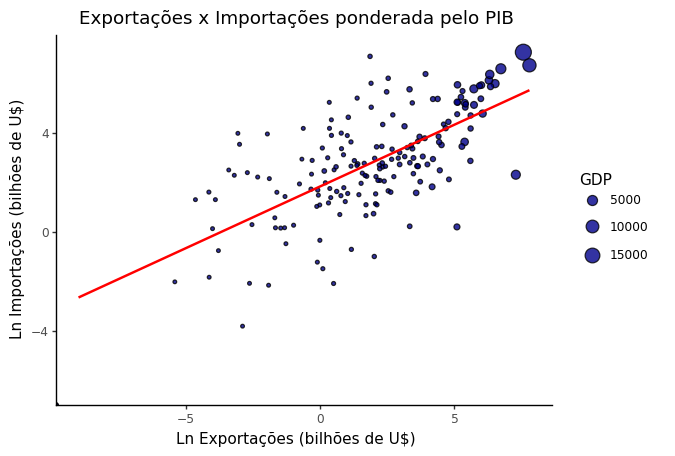

<ggplot: (166482611330)>

In [21]:
#########################################Item a)############################################################
ggplot(final_database_total, aes(x="ln(exports)", y="ln(imports)", size="GDP")) + \
    geom_point(alpha=0.8, fill="darkblue") + \
    labs(x="Ln Exportações (bilhões de U$)", y="Ln Importações (bilhões de U$)", \
         title="Exportações x Importações ponderada pelo PIB") + \
    geom_smooth(method="lm", color="red", se=False, show_legend=False) + \
    theme_classic()

In [22]:
##########################################Item b)###########################################################
final_database_total["total_commerce/GDP"] = final_database_total["total_commerce"]/final_database_total["GDP"]
final_database_total

final_database_total["ln(GDP)"] = np.log(final_database_total["GDP"])
final_database_total

,Country,GDP,Population,exports,imports,trade_balance,total_commerce,ln(exports),ln(imports),total_commerce/GDP,ln(GDP)
0,Afghanistan,19.362642,35383128.0,0.907390,5.462004,-4.554614,6.369394,-0.097183,1.697816,0.328953,2.963346
1,Albania,11.861201,2876101.0,2.153475,4.353089,-2.199614,6.506564,0.767083,1.470886,0.548559,2.473273
2,Antarctica,NaN,NaN,0.008771,0.118942,-0.110170,0.127713,-4.736266,-2.129122,NaN,NaN
3,Algeria,160.033844,40551404.0,30.914690,29.175478,1.739213,60.090168,3.431231,3.373329,0.375484,5.075385
4,American Samoa,0.652000,55741.0,0.040456,9.925414,-9.884958,9.965870,-3.207545,2.295099,15.285076,-0.427711
...,...,...,...,...,...,...,...,...,...,...,...
236,Wallis and Futuna Islands,NaN,NaN,0.000386,0.344644,-0.344258,0.345030,-7.860593,-1.065243,NaN,NaN
237,Samoa,0.799376,194535.0,0.183128,1.781010,-1.597882,1.964138,-1.697569,0.577181,2.457088,-0.223923
238,Yemen,NaN,NaN,0.859306,1.589627,-0.730321,2.448933,-0.151630,0.463499,NaN,NaN
239,Serbia and Montenegro,NaN,NaN,0.000000,0.000000,0.000000,0.000000,-inf,-inf,NaN,NaN


C:\Users\david\anaconda3\lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_point : Removed 64 rows containing missing values.


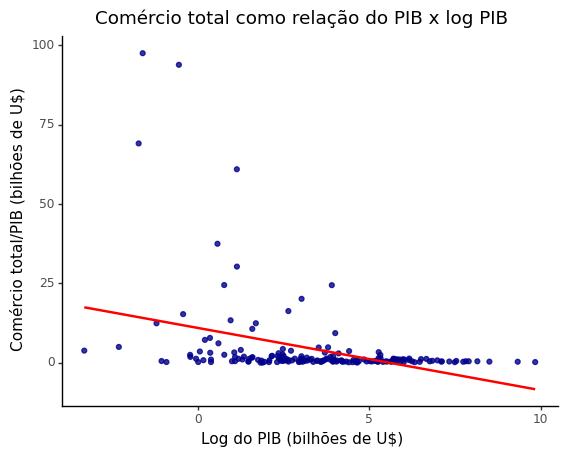

<ggplot: (166497840984)>

In [23]:
#Gráfico com outliers:
(ggplot(final_database_total, aes(x = "ln(GDP)", y = "total_commerce/GDP")) + \
     geom_point(alpha = 0.8, color = "darkblue") + \
     labs(x = "Log do PIB (bilhões de U$)", y = "Comércio total/PIB (bilhões de U$)",
         title = "Comércio total como relação do PIB x log PIB") + \
     geom_smooth(method="lm", color="red", se=False, show_legend=False) + \
     theme_classic())

C:\Users\david\anaconda3\lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_point : Removed 73 rows containing missing values.
C:\Users\david\anaconda3\lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_smooth : Removed 15 rows containing missing values.


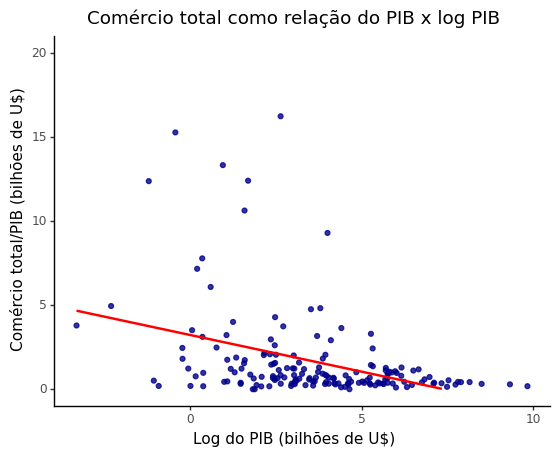

<ggplot: (166497609457)>

In [24]:
#Gráfico sem outliers:
(ggplot(final_database_total, aes(x = "ln(GDP)", y = "total_commerce/GDP")) + \
     geom_point(alpha = 0.8, color = "darkblue") + \
     labs(x = "Log do PIB (bilhões de U$)", y = "Comércio total/PIB (bilhões de U$)",
         title = "Comércio total como relação do PIB x log PIB") + \
     geom_smooth(method="lm", color="red", se=False, show_legend=False) + \
     ylim(0,20) + \
     theme_classic())

In [25]:
##########################################2.3#############################################################
#Item a)
#Retirando os dados desnecessários ao que pede o item:
final_database_sector = final_database_sector.drop(columns=["trade_balance", "total_commerce"])
final_database_sector["exports/pop"] = final_database_sector["exports"]/final_database_sector["Population"]
final_database_sector["imports/pop"] = final_database_sector["imports"]/final_database_sector["Population"]
final_database_sector.head(10)

,Country,GDP,Population,broad_sector,exports,imports,exports/pop,imports/pop
0,Afghanistan,19.362642,35383128.0,Agriculture,4.892683e-01,0.472355,1.382773e-08,1.334974e-08
1,Afghanistan,19.362642,35383128.0,Mining & Energy,9.757177e-02,0.006542,2.757579e-09,1.848852e-10
2,Afghanistan,19.362642,35383128.0,Manufacturing,3.192499e-01,4.962128,9.022659e-09,1.402399e-07
3,Afghanistan,19.362642,35383128.0,Services,1.300000e-03,0.020979,3.674068e-11,5.929099e-10
4,Albania,11.861201,2876101.0,Agriculture,1.080260e-01,0.858472,3.755988e-08,2.984847e-07
5,Albania,11.861201,2876101.0,Mining & Energy,5.116979e-01,0.020946,1.779137e-07,7.282776e-09
6,Albania,11.861201,2876101.0,Manufacturing,1.533651e+00,3.469467,5.332395e-07,1.206309e-06
7,Albania,11.861201,2876101.0,Services,1.000000e-04,0.004204,3.476929e-11,1.461600e-09
8,Antarctica,NaN,NaN,Agriculture,0.000000e+00,0.000000,NaN,NaN
9,Antarctica,NaN,NaN,Mining & Energy,2.490000e-07,0.000000,NaN,NaN


In [26]:
final_a_exports_pc= final_database_sector.pivot(index='Country', columns='broad_sector', values='exports/pop').reset_index()
final_a_exports_pc.head(50)

broad_sector,Country,Agriculture,Mining & Energy,Manufacturing,Services
0,Afghanistan,1.382773e-08,2.757579e-09,9.022659e-09,3.674068e-11
1,Albania,3.755988e-08,1.779137e-07,5.332395e-07,3.476929e-11
2,Algeria,1.454845e-09,5.128387e-07,2.472852e-07,7.792579e-10
3,American Samoa,2.951203e-09,9.036130e-08,6.324697e-07,0.000000e+00
4,Andorra,1.125529e-09,3.687206e-10,1.242122e-06,7.762268e-09
5,Angola,4.281878e-11,9.427116e-07,2.687985e-08,1.664212e-10
6,Anguilla,NaN,NaN,NaN,NaN
7,Antarctica,NaN,NaN,NaN,NaN
8,Antigua and Barbuda,3.935384e-08,1.950765e-11,2.793712e-06,0.000000e+00
9,Argentina,3.559084e-07,4.461524e-08,1.001994e-06,7.726686e-08


In [27]:
final_a_imports_pc= final_database_sector.pivot(index='Country', columns='broad_sector', values='imports/pop').reset_index()

In [28]:
#Item b)
import geopandas as gpd

#leitura dos dados geográficos de cada país
map_data = gpd.read_file(r'com_int_dados_aps1\ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')
map_data

#Renomeando "SOVEREIGNT" para "Country"
map_data = map_data.rename(columns = {"SOVEREIGNT" : "Country"})

In [29]:
#Base agregada com os dados geográficos e de exportações per capita
final_a_exports_pc_map = pd.merge(map_data, final_a_exports_pc, on='Country')
final_a_exports_pc_map.head(10)

#Base agregada com os dados geográficos e de importações per capita
final_a_imports_pc_map = pd.merge(map_data, final_a_imports_pc, on='Country')
final_a_imports_pc_map.head(10)

,featurecla,scalerank,LABELRANK,Country,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry,Agriculture,Mining & Energy,Manufacturing,Services
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",1.112722e-08,0.000000e+00,8.380298e-06,1.570114e-08
1,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,NaN,Unrecognized,NaN,NaN,NaN,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN
2,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",1.505709e-07,1.148141e-08,2.773346e-06,3.874073e-07
3,Admin-0 country,1,3,Kazakhstan,KA1,1,1,Sovereignty,1,Kazakhstan,...,NaN,NaN,NaN,NaN,NaN,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",1.110084e-07,9.895265e-09,9.999286e-07,2.614525e-09
4,Admin-0 country,1,3,Uzbekistan,UZB,0,2,Sovereign country,1,Uzbekistan,...,NaN,NaN,NaN,NaN,NaN,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",5.905817e-09,2.913137e-11,6.008493e-08,7.003033e-11
5,Admin-0 country,1,2,Papua New Guinea,PNG,0,2,Sovereign country,1,Papua New Guinea,...,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ...",7.929934e-09,1.332256e-11,1.125945e-06,4.315510e-09
6,Admin-0 country,1,2,Indonesia,IDN,0,2,Sovereign country,1,Indonesia,...,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",2.260245e-09,2.477425e-10,1.451232e-06,1.144607e-08
7,Admin-0 country,1,2,Argentina,ARG,0,2,Sovereign country,1,Argentina,...,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",3.936866e-09,4.974426e-10,1.377282e-07,7.349834e-10
8,Admin-0 country,1,2,Chile,CHL,0,2,Sovereign country,1,Chile,...,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335...",1.715763e-09,5.055520e-11,1.030202e-06,1.827060e-08
9,Admin-0 country,1,6,Somalia,SOM,0,2,Sovereign country,1,Somalia,...,NaN,NaN,NaN,NaN,NaN,"POLYGON ((41.58513 -1.68325, 40.99300 -0.85829...",2.429005e-08,5.979309e-09,9.615580e-07,0.000000e+00


In [31]:
from mpl_toolkits.axes_grid1 import make_axes_locatable 

#Removendo a Antártica, pois influencia negativamente na plotagem do mapa.
world= final_a_imports_pc_map[(final_a_imports_pc_map.Services>0) & (final_a_imports_pc_map.Country!="Antarctica") & (final_a_imports_pc_map['Mining & Energy']>0) & (final_a_imports_pc_map['Manufacturing']>0) & (final_a_imports_pc_map['Agriculture']>0)]

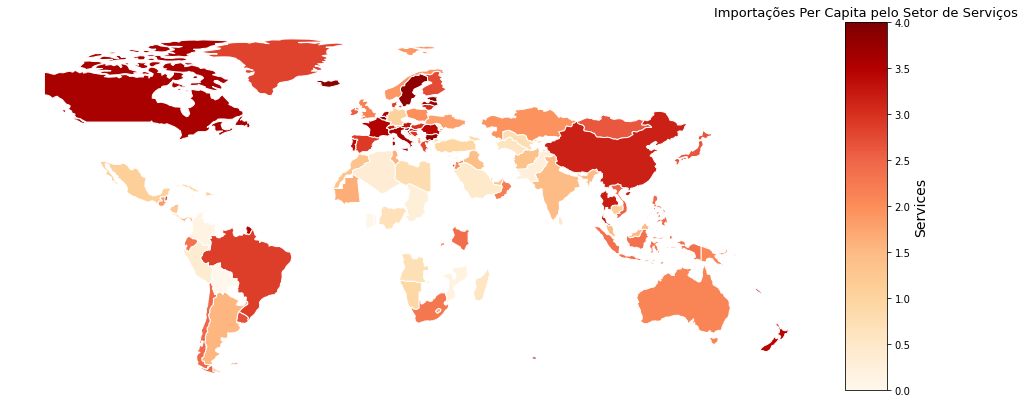

In [74]:
import mapclassify
from mpl_toolkits.axes_grid1 import make_axes_locatable

q10 = mapclassify.Quantiles(world.Services, k=5)

fig, ax = plt.subplots(figsize=(16, 9))
world.assign(cl=q10.yb).plot(
    column="Services",
    categorical=True,
    k=2,
    cmap="OrRd",
    linewidth=1,
    edgecolor="white",
    ax=ax
)
ax.set_axis_off()

#Adicionando legenda ao mapa mundi.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
sm = plt.cm.ScalarMappable(cmap="OrRd", norm=plt.Normalize(vmin=q10.yb.min(), vmax=q10.yb.max()))
sm._A = []  #Criando um array vazio para evitar erro de vazio
cbar = plt.colorbar(sm, cax=cax)
cbar.ax.set_ylabel("Services", fontsize=14)

# Adicionando título
plt.title("Importações Per Capita pelo Setor de Serviços", fontsize=13)

# Mostrar o plot
plt.show()

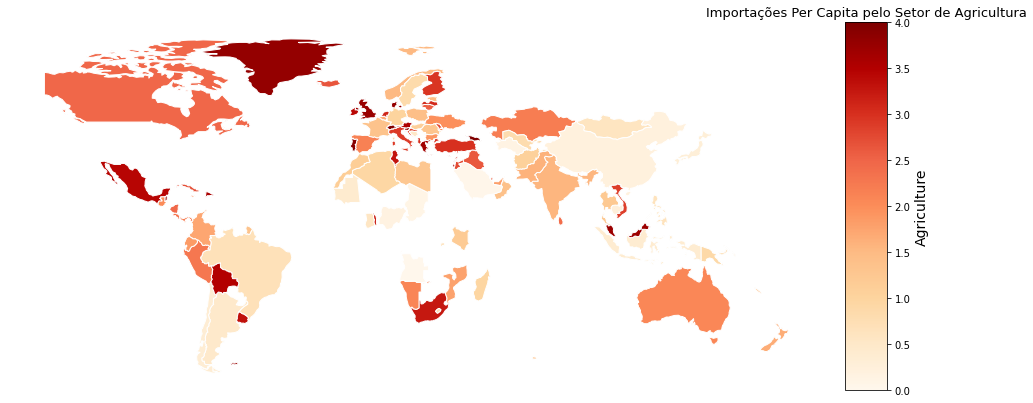

In [71]:
q10 = mapclassify.Quantiles(world.Agriculture, k=5)

fig, ax = plt.subplots(figsize=(16, 9))
world.assign(cl=q10.yb).plot(
    column="Agriculture",
    categorical=True,
    k=2,
    cmap="OrRd",
    linewidth=1,
    edgecolor="white",
    ax=ax
)
ax.set_axis_off()


divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
sm = plt.cm.ScalarMappable(cmap="OrRd", norm=plt.Normalize(vmin=q10.yb.min(), vmax=q10.yb.max()))
sm._A = []  
cbar = plt.colorbar(sm, cax=cax)
cbar.ax.set_ylabel("Agriculture", fontsize=14)


plt.title("Importações Per Capita pelo Setor de Agricultura", fontsize=13)


plt.show()

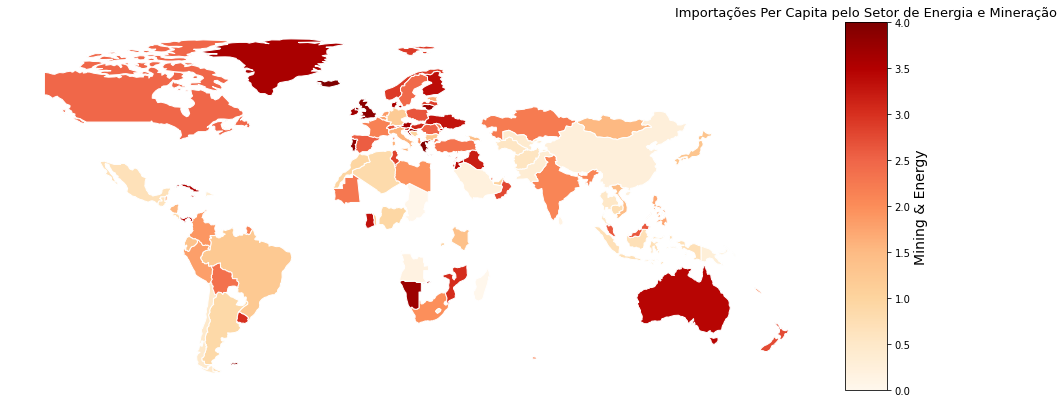

In [72]:
q10 = mapclassify.Quantiles(world['Mining & Energy'], k=5)

fig, ax = plt.subplots(figsize=(16, 9))
world.assign(cl=q10.yb).plot(
    column="Mining & Energy",
    categorical=True,
    k=2,
    cmap="OrRd",
    linewidth=1,
    edgecolor="white",
    ax=ax
)
ax.set_axis_off()


divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
sm = plt.cm.ScalarMappable(cmap="OrRd", norm=plt.Normalize(vmin=q10.yb.min(), vmax=q10.yb.max()))
sm._A = []  
cbar = plt.colorbar(sm, cax=cax)
cbar.ax.set_ylabel("Mining & Energy", fontsize=14)


plt.title("Importações Per Capita pelo Setor de Energia e Mineração", fontsize=13)


plt.show()

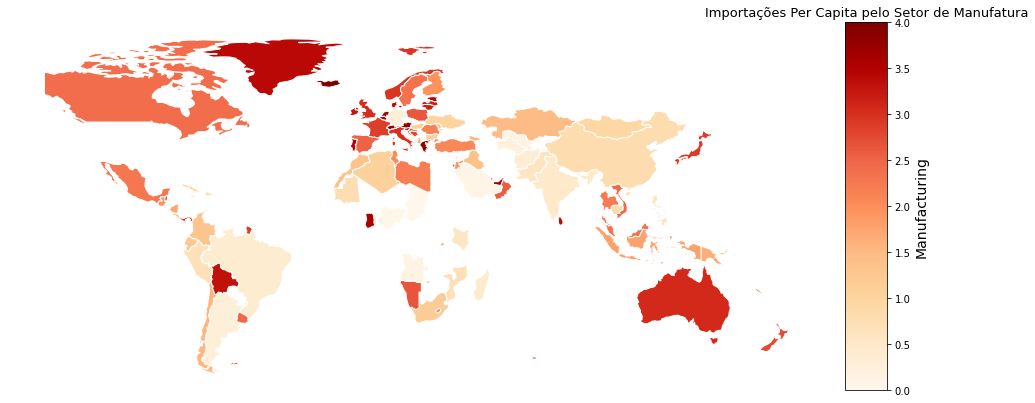

In [73]:
q10 = mapclassify.Quantiles(world['Manufacturing'], k=5)

fig, ax = plt.subplots(figsize=(16, 9))
world.assign(cl=q10.yb).plot(
    column="Manufacturing",
    categorical=True,
    k=2,
    cmap="OrRd",
    linewidth=1,
    edgecolor="white",
    ax=ax
)
ax.set_axis_off()


divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
sm = plt.cm.ScalarMappable(cmap="OrRd", norm=plt.Normalize(vmin=q10.yb.min(), vmax=q10.yb.max()))
sm._A = []  
cbar = plt.colorbar(sm, cax=cax)
cbar.ax.set_ylabel("Manufacturing", fontsize=14)


plt.title("Importações Per Capita pelo Setor de Manufatura", fontsize=13)


plt.show()

In [36]:
world_ex= final_a_exports_pc_map[(final_a_exports_pc_map.Services>0) & (final_a_exports_pc_map.Country!="Antarctica") & (final_a_exports_pc_map['Mining & Energy']>0) & (final_a_exports_pc_map['Manufacturing']>0) & (final_a_exports_pc_map['Agriculture']>0)]

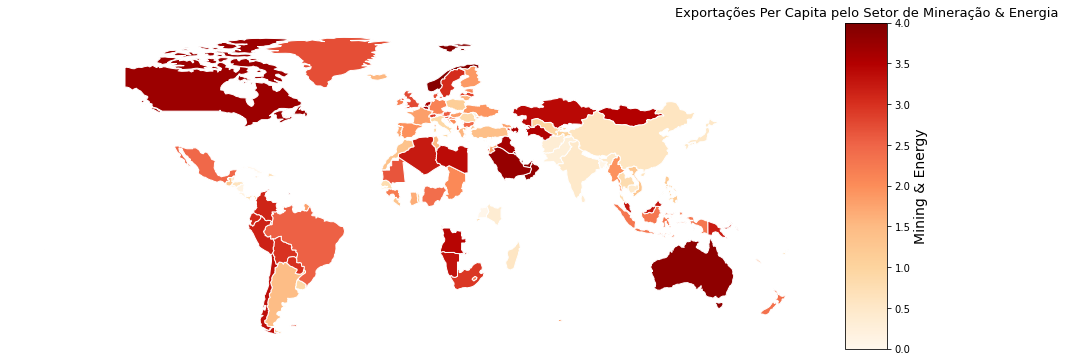

In [76]:
q10 = mapclassify.Quantiles(world_ex['Mining & Energy'], k=5)

fig, ax = plt.subplots(figsize=(16, 9))
world_ex.assign(cl=q10.yb).plot(
    column="Mining & Energy",
    categorical=True,
    k=2,
    cmap="OrRd",
    linewidth=1,
    edgecolor="white",
    ax=ax
)
ax.set_axis_off()


divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
sm = plt.cm.ScalarMappable(cmap="OrRd", norm=plt.Normalize(vmin=q10.yb.min(), vmax=q10.yb.max()))
sm._A = [] 
cbar = plt.colorbar(sm, cax=cax)
cbar.ax.set_ylabel("Mining & Energy", fontsize=14)


plt.title("Exportações Per Capita pelo Setor de Mineração & Energia", fontsize=13)


plt.show()

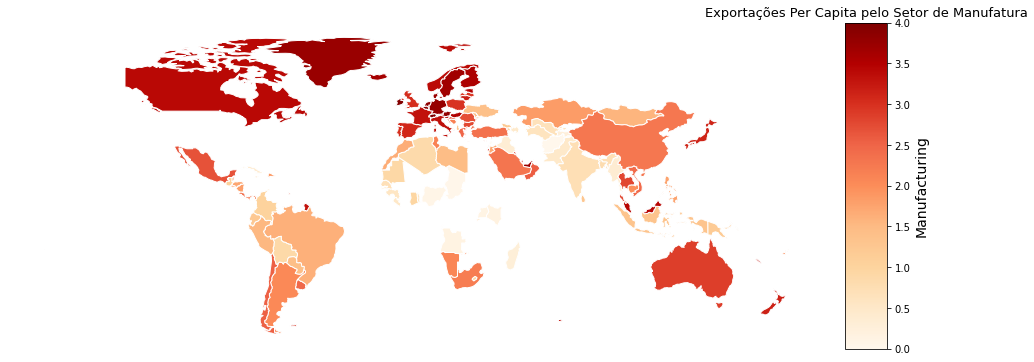

In [68]:
q10 = mapclassify.Quantiles(world_ex.Manufacturing, k=5)

fig, ax = plt.subplots(figsize=(16, 9))
world_ex.assign(cl=q10.yb).plot(
    column="Manufacturing",
    categorical=True,
    k=2,
    cmap="OrRd",
    linewidth=1,
    edgecolor="white",
    ax=ax
)
ax.set_axis_off()


divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
sm = plt.cm.ScalarMappable(cmap="OrRd", norm=plt.Normalize(vmin=q10.yb.min(), vmax=q10.yb.max()))
sm._A = [] 
cbar = plt.colorbar(sm, cax=cax)
cbar.ax.set_ylabel("Manufacturing", fontsize=14)


plt.title("Exportações Per Capita pelo Setor de Manufatura", fontsize=13)


plt.show()

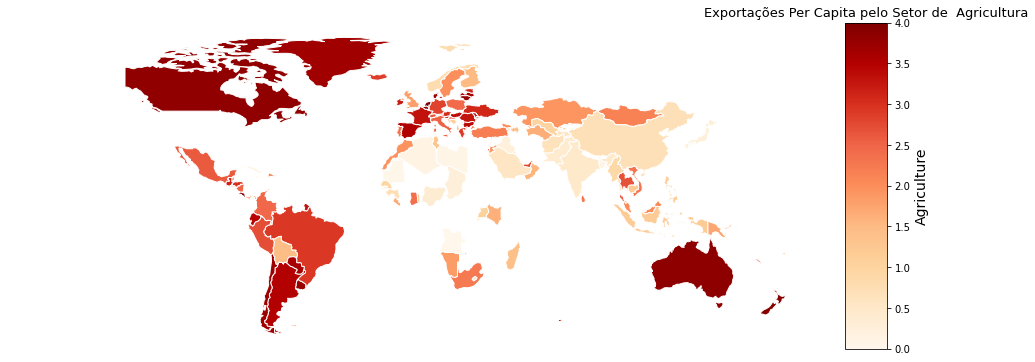

In [70]:
q10 = mapclassify.Quantiles(world_ex.Agriculture, k=5)

fig, ax = plt.subplots(figsize=(16, 9))
world_ex.assign(cl=q10.yb).plot(
    column="Agriculture",
    categorical=True,
    k=2,
    cmap="OrRd",
    linewidth=1,
    edgecolor="white",
    ax=ax
)
ax.set_axis_off()


divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
sm = plt.cm.ScalarMappable(cmap="OrRd", norm=plt.Normalize(vmin=q10.yb.min(), vmax=q10.yb.max()))
sm._A = [] 
cbar = plt.colorbar(sm, cax=cax)
cbar.ax.set_ylabel("Agriculture", fontsize=14)

plt.title("Exportações Per Capita pelo Setor de  Agricultura", fontsize=13)

# Show the plot
plt.show()

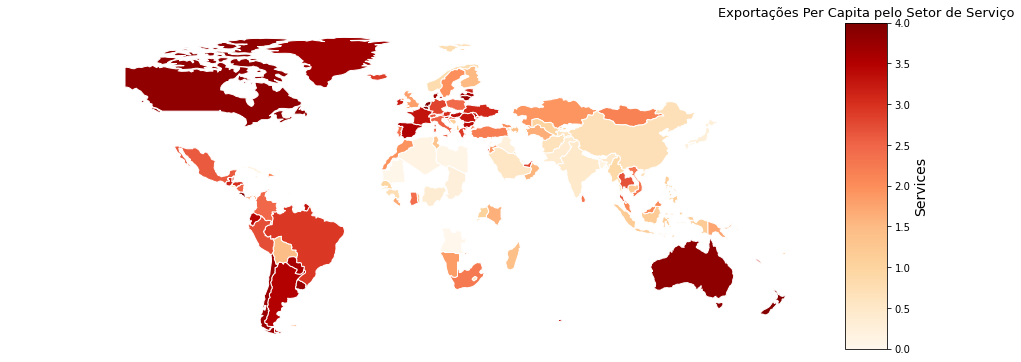

In [75]:
q10 = mapclassify.Quantiles(world_ex.Agriculture, k=5)

fig, ax = plt.subplots(figsize=(16, 9))
world_ex.assign(cl=q10.yb).plot(
    column="Agriculture",
    categorical=True,
    k=2,
    cmap="OrRd",
    linewidth=1,
    edgecolor="white",
    ax=ax
)
ax.set_axis_off()


divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
sm = plt.cm.ScalarMappable(cmap="OrRd", norm=plt.Normalize(vmin=q10.yb.min(), vmax=q10.yb.max()))
sm._A = [] 
cbar = plt.colorbar(sm, cax=cax)
cbar.ax.set_ylabel("Services", fontsize=14)

plt.title("Exportações Per Capita pelo Setor de Serviço", fontsize=13)

# Show the plot
plt.show()

In [63]:
#Item c

# Agrupar os dados por setor
final_database_sector_filtrada = final_database_sector.drop(['GDP', 'Population','imports','exports/pop','imports/pop'], axis=1)
setores = final_database_sector_filtrada.groupby('broad_sector')

# Classificar os grupos em ordem decrescente com base nos valores de exportação absolutos
setores_export = setores.apply(lambda x: x.nlargest(5, ['exports']))
setores_export

Country     broad_sector      exports
broad_sector                                                     
Agriculture     920   United States      Agriculture    72.068645
                96           Brazil      Agriculture    36.528111
                580     Netherlands      Agriculture    25.791887
                144          Canada      Agriculture    21.426398
                172           China      Agriculture    20.215533
Mining & Energy 717          Russia  Mining & Energy   115.987843
                761    Saudi Arabia  Mining & Energy   104.950706
                41        Australia  Mining & Energy   104.522912
                145          Canada  Mining & Energy    61.349203
                409            Iraq  Mining & Energy    46.060823
Manufacturing   174           China    Manufacturing  2262.066360
                922   United States    Manufacturing  1225.300472
                326         Germany    Manufacturing  1194.589090
                434           Japan    Manufacturing   702.802649
                454    Korea, South    Manufacturing   546.633659
Services        923   United States         Services   609.676806
                327         Germany         Services   243.695300
                911  United Kingdom         Services   203.054463
                295          France         Services   183.651238
                583     Netherlands         Services   169.690318

In [65]:
# Agrupar os dados por setor
final_database_sector_filtrada = final_database_sector.drop(['GDP', 'Population','exports','exports/pop','imports/pop'], axis=1)
setores = final_database_sector_filtrada.groupby('broad_sector')

# Classificar os grupos em ordem decrescente com base nos valores de importações absolutos
setores_export = setores.apply(lambda x: x.nlargest(5, ['imports']))
setores_export

Country     broad_sector      imports
broad_sector                                                     
Agriculture     920   United States      Agriculture   402.382474
                176          Taiwan      Agriculture   161.726022
                536          Mexico      Agriculture    83.889600
                908  United Kingdom      Agriculture    78.012073
                424   Cote d'Ivoire      Agriculture    71.571072
Mining & Energy 921   United States  Mining & Energy   268.799406
                341          Greece  Mining & Energy    66.361577
                909  United Kingdom  Mining & Energy    42.484061
                397           India  Mining & Energy    11.213541
                693        Portugal  Mining & Energy     6.214357
Manufacturing   918        Tanzania    Manufacturing  1181.681899
                178          Taiwan    Manufacturing   814.092370
                922   United States    Manufacturing   758.318544
                434           Japan    Manufacturing   728.398956
                174           China    Manufacturing   680.868555
Services        175           China         Services   161.367592
                423           Italy         Services    29.478977
                71          Belgium         Services    24.248406
                295          France         Services    20.318425
                771          Serbia         Services    17.796969

In [66]:
# Agrupar os dados por setor
final_database_sector_filtrada = final_database_sector.drop(['GDP', 'Population','exports', 'imports','imports/pop'], axis=1)
setores = final_database_sector_filtrada.groupby('broad_sector')

# Classificar os grupos em ordem decrescente com base nos valores de exportações per capita
setores_export = setores.apply(lambda x: x.nlargest(5, ['exports/pop']))
setores_export

Country     broad_sector   exports/pop
broad_sector                                                            
Agriculture     580           Netherlands      Agriculture  1.514469e-06
                212            Costa Rica      Agriculture  7.332099e-07
                612           New Zealand      Agriculture  7.118574e-07
                68                Belgium      Agriculture  6.324726e-07
                40              Australia      Agriculture  6.278531e-07
Mining & Energy 709                 Qatar  Mining & Energy  1.361889e-05
                457                Kuwait  Mining & Energy  7.242532e-06
                637                Norway  Mining & Energy  6.605637e-06
                869  United Arab Emirates  Mining & Energy  4.797865e-06
                41              Australia  Mining & Energy  4.320752e-06
Manufacturing   154        Cayman Islands    Manufacturing  3.589804e-05
                782             Singapore    Manufacturing  3.522837e-05
                838           Switzerland    Manufacturing  3.461559e-05
                414               Ireland    Manufacturing  3.308574e-05
                498            Luxembourg    Manufacturing  2.572329e-05
Services        75                Bermuda         Services  3.749373e-04
                499            Luxembourg         Services  1.437471e-04
                415               Ireland         Services  2.352519e-05
                783             Singapore         Services  1.228400e-05
                839           Switzerland         Services  9.980300e-06

In [67]:
# Agrupar os dados por setor
final_database_sector_filtrada = final_database_sector.drop(['GDP', 'Population','exports', 'exports/pop','imports'], axis=1)
setores = final_database_sector_filtrada.groupby('broad_sector')

# Classificar os grupos em ordem decrescente com base nos valores de importações per capita
setores_export = setores.apply(lambda x: x.nlargest(5, ['imports/pop']))
setores_export

Country     broad_sector  imports/pop
broad_sector                                                             
Agriculture     240                Dominica      Agriculture     0.000102
                152          Cayman Islands      Agriculture     0.000032
                312                 Georgia      Agriculture     0.000014
                836             Switzerland      Agriculture     0.000007
                692                Portugal      Agriculture     0.000005
Mining & Energy 153          Cayman Islands  Mining & Energy     0.000020
                113  British Virgin Islands  Mining & Energy     0.000014
                393                 Iceland  Mining & Energy     0.000012
                73                  Bermuda  Mining & Energy     0.000008
                341                  Greece  Mining & Energy     0.000006
Manufacturing   334               Gibraltar    Manufacturing     0.004133
                114  British Virgin Islands    Manufacturing     0.002063
                394                 Iceland    Manufacturing     0.001203
                586                 Curacao    Manufacturing     0.001180
                154          Cayman Islands    Manufacturing     0.000737
Services        795                Slovenia         Services     0.000003
                771                  Serbia         Services     0.000003
                71                  Belgium         Services     0.000002
                271                 Estonia         Services     0.000001
                395                 Iceland         Services     0.000001

C:\Users\david\AppData\Local\Temp\ipykernel_1756\1342131497.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


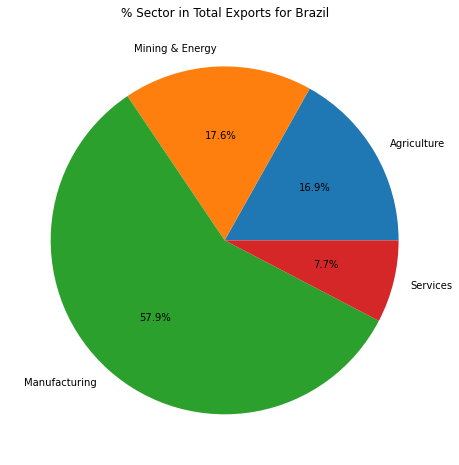

C:\Users\david\AppData\Local\Temp\ipykernel_1756\1342131497.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


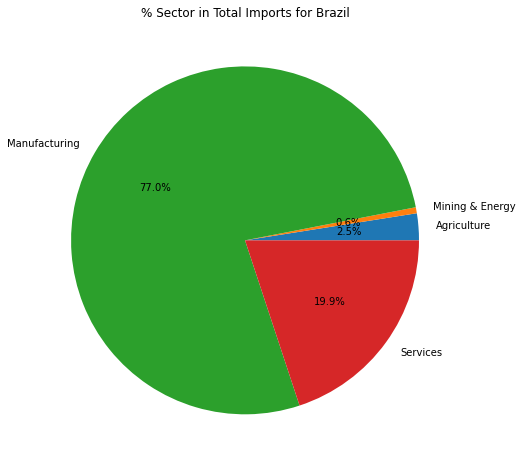

C:\Users\david\AppData\Local\Temp\ipykernel_1756\1342131497.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


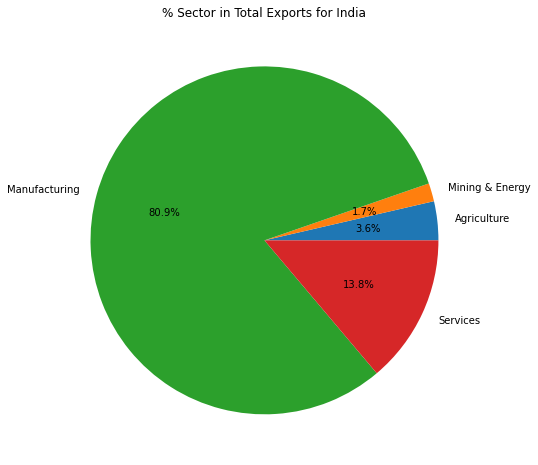

C:\Users\david\AppData\Local\Temp\ipykernel_1756\1342131497.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


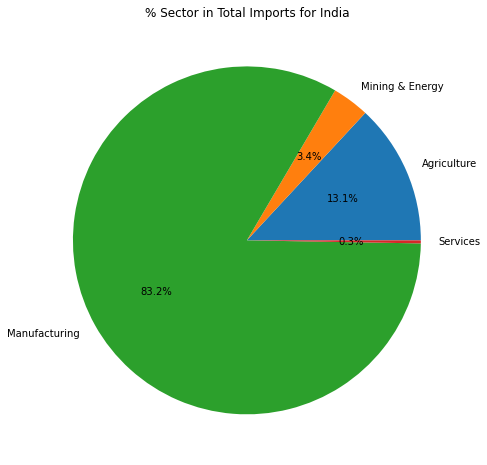

In [78]:
itpd_brazil = itpd_ie_sector[itpd_ie_sector['Country'] == 'Brazil']
itpd_brazil
total_export = itpd_brazil['exports'].sum()
total_export
itpd_brazil['% Sector in Total Exports'] = (itpd_brazil['exports']/total_export) * 100
itpd_brazil
# Configurando o tamanho da figura
plt.figure(figsize=(8, 8))

# Criando o gráfico de setores
plt.pie(itpd_brazil['% Sector in Total Exports'], labels=itpd_brazil['broad_sector'], autopct='%1.1f%%')

# Título
plt.title('% Sector in Total Exports for Brazil')

# Mostrando o gráfico
plt.show()
total_import = itpd_brazil['imports'].sum()
itpd_brazil['% Sector in Total Imports'] = (itpd_brazil['imports']/total_export) * 100


plt.figure(figsize=(8, 8))


plt.pie(itpd_brazil['% Sector in Total Imports'], labels=itpd_brazil['broad_sector'], autopct='%1.1f%%')


plt.title('% Sector in Total Imports for Brazil')


plt.show()
itpd_india = itpd_ie_sector[itpd_ie_sector['Country'] == 'India']
itpd_india
total_export_india = itpd_india['exports'].sum()
total_export_india
itpd_india['% Sector in Total Exports'] = (itpd_india['exports']/total_export_india) * 100
itpd_india

plt.figure(figsize=(8, 8))


plt.pie(itpd_india['% Sector in Total Exports'], labels=itpd_india['broad_sector'], autopct='%1.1f%%')


plt.title('% Sector in Total Exports for India')


plt.show()
total_imports_india = itpd_india['imports'].sum()
itpd_india['% Sector in Total Imports'] = (itpd_india['imports']/total_export) * 100


plt.figure(figsize=(8, 8))


plt.pie(itpd_india['% Sector in Total Imports'], labels=itpd_india['broad_sector'], autopct='%1.1f%%')


plt.title('% Sector in Total Imports for India')


plt.show()
